# Name: Akanksha Anil Sawant.

# PRN: 23070243042

# Date: 17-11-2024

# Binary Classification:  Heart Disease Dataset

# Business Case:

## ***Predicting Heart Disease for Better Healthcare Management***

Heart disease remains one of the leading causes of death worldwide, and early detection is crucial in providing effective treatment and improving patient outcomes. Accurate prediction models can help healthcare providers identify at-risk patients before they develop severe conditions, leading to timely interventions. The goal is to develop a machine learning model that can predict whether a person is at risk of heart disease based on medical and personal attributes.

By using predictive analytics, healthcare providers can prioritize patients for further tests, reduce healthcare costs, and improve overall patient care. Early diagnosis can lead to better management of heart disease and reduce the burden on healthcare systems.

# Problem Statement:

**Objective:** To develop a binary classification model using a Deep Neural Network (DNN) to predict the presence or absence of heart disease based on patient data.

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [ ]:
# Load the Heart Disease dataset from a local file
data = pd.read_csv('/content/heart.csv')

# Show the first few rows of the dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
print(data.tail())

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


Domain Analysis

## Features:
- Age
- Sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Target:
- target

In [ ]:
# First 5 data rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Last 5 data rows
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Total number of columns and rows
data.shape

(1025, 14)

There are 14 columns and 1025 rows present in the dataset.

In [ ]:
# Imformation about the columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Stastitical Analysis for the Numerical and categorical data

In [ ]:
# describe the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

In [ ]:
data.target.value_counts()

,count
target,
1,526
0,499


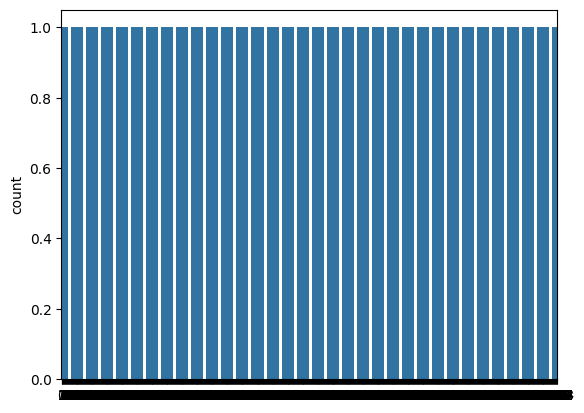

In [ ]:
sns.countplot(data.target)
plt.show()

# Checking Distribution of Feature

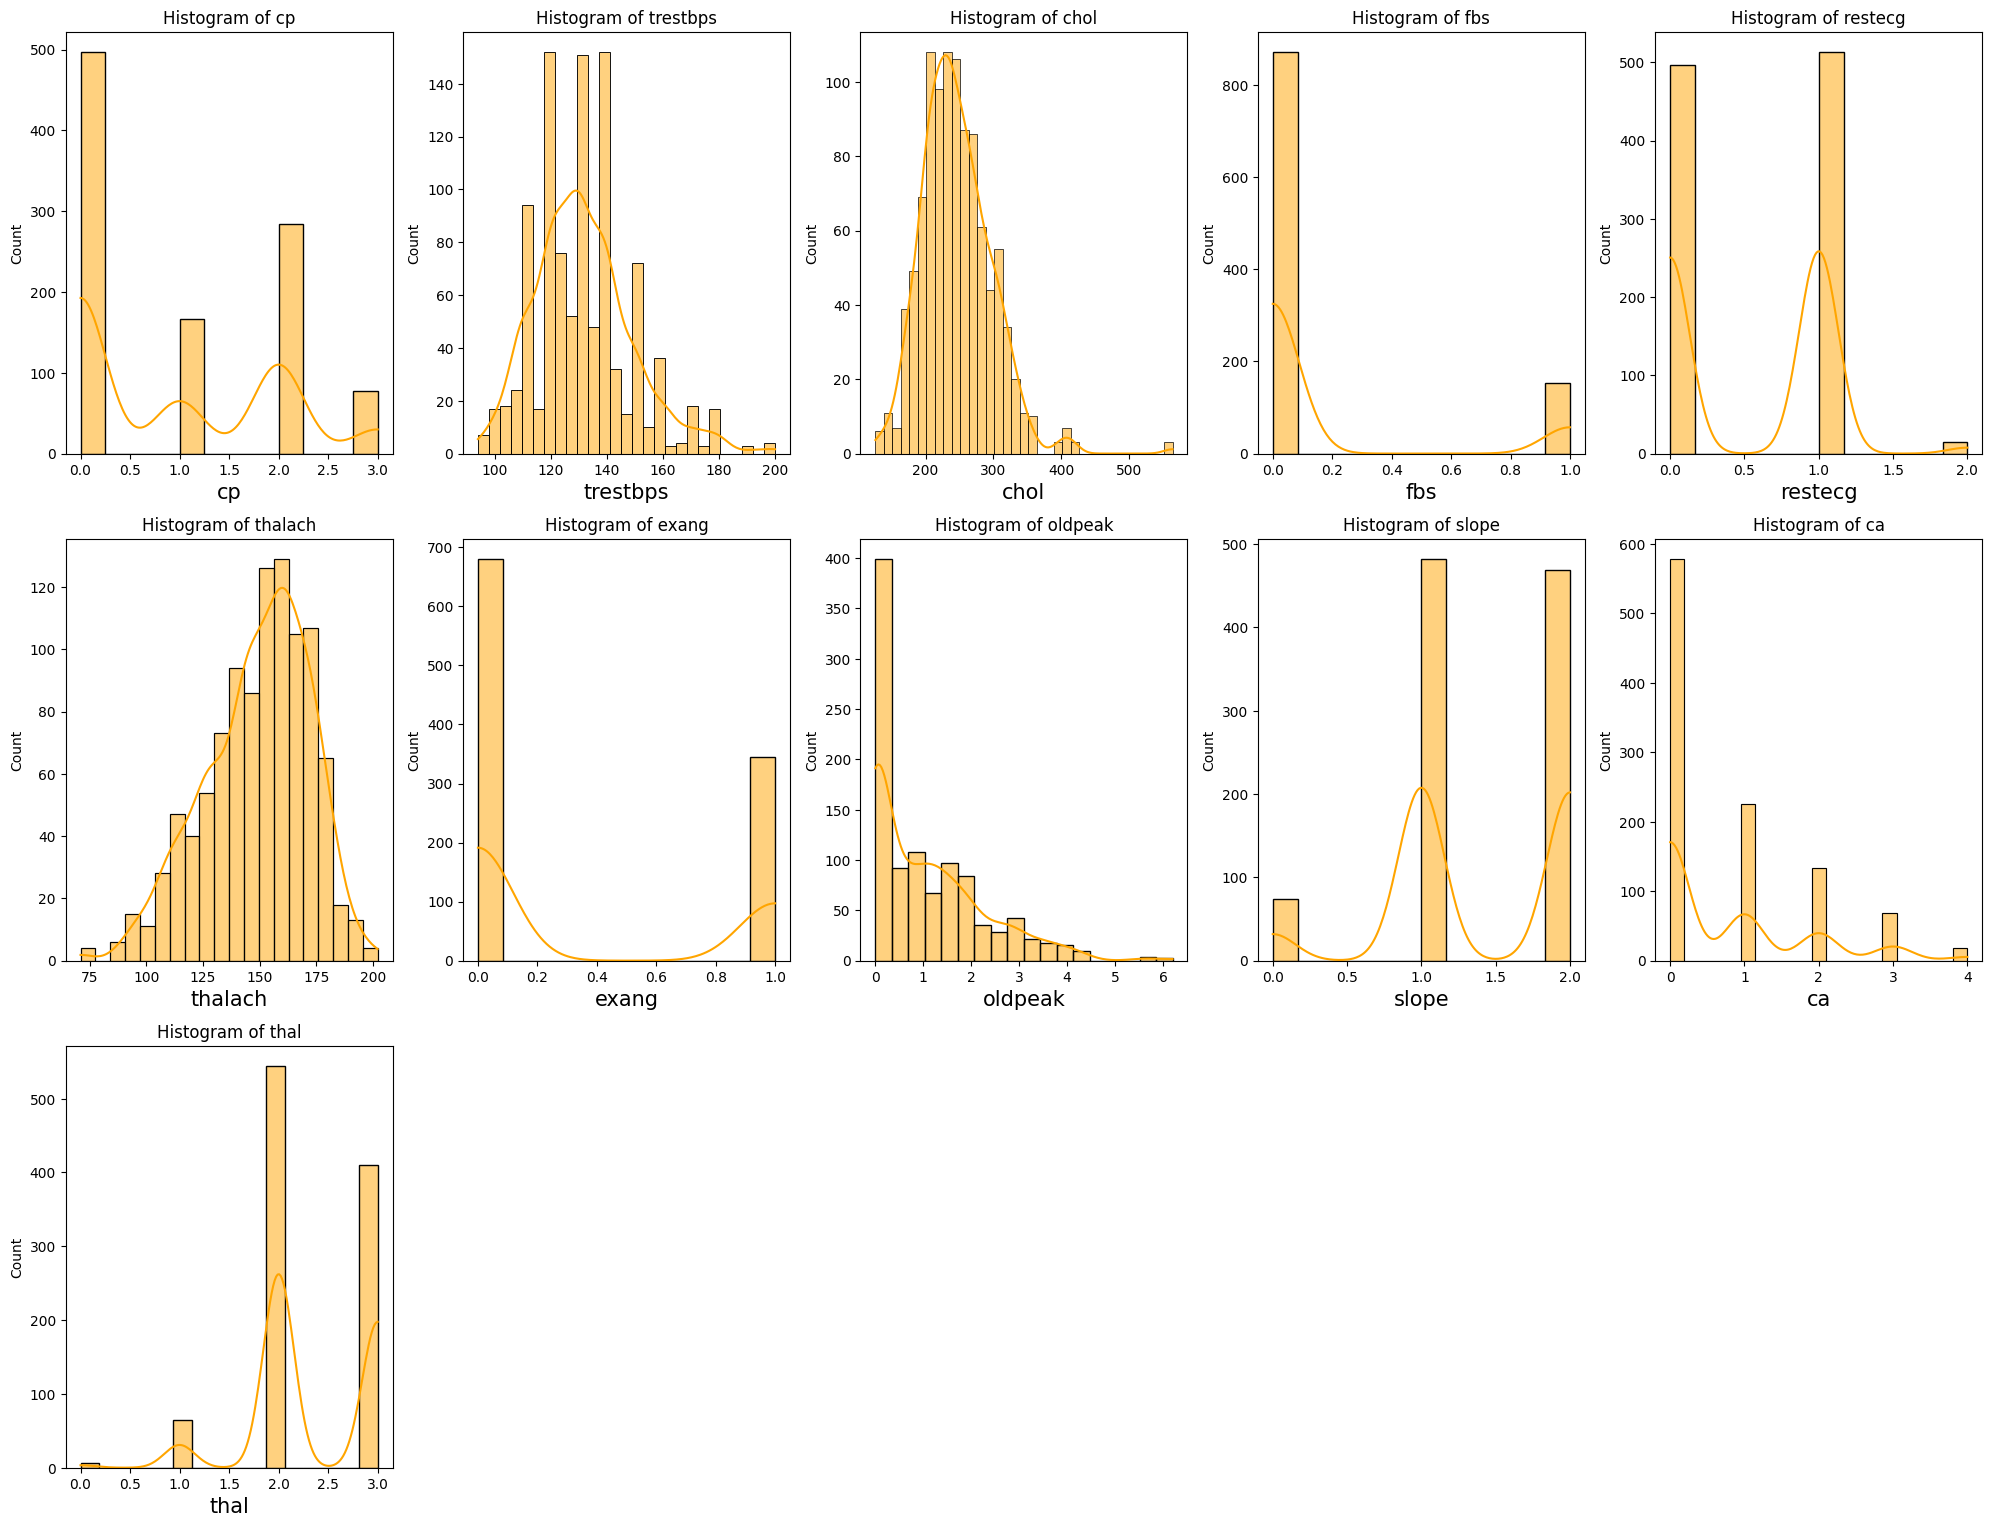

In [ ]:
dist = data.iloc[:, 2:102]
plt.figure(figsize=(20, 25), facecolor='white')  # Define canvas size
plotno = 1  # Counter

for column in dist.columns:  # Iterate over the column names
    if plotno <= 11:  # Ensure we're plotting only the first 100 columns
        plt.subplot(5, 5, plotno)  # Create a grid of 10x10 plots
        sns.histplot(dist[column].dropna(), kde=True, color='orange')  # Dropping NaN values for better plots
        plt.xlabel(column, fontsize=15)  # Set the x-axis label with the feature name
        plt.ylabel('Count')  # Optionally add a label to the y-axis
        plt.title(f'Histogram of {column}', fontsize=12)  # Optionally add a title for each subplot
    plotno += 1

plt.tight_layout(pad=1.0)  # Adjust padding between plots
plt.show()

# Statistical Analysis

## Distribution of Mean and Standard Deviation of the Data

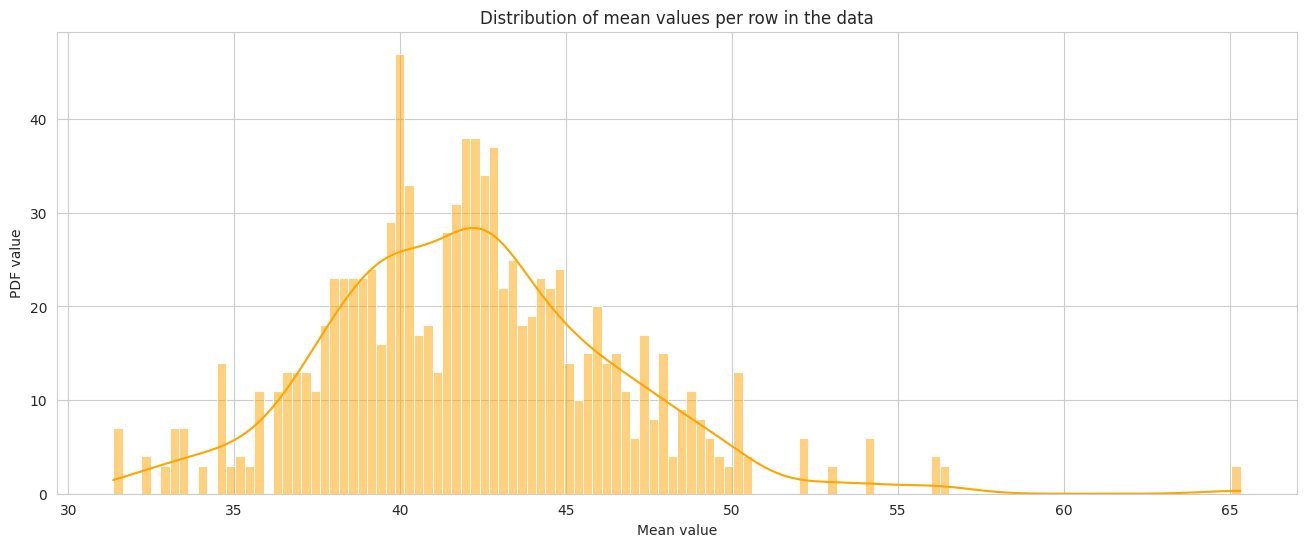

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,6))
sns.set_style('whitegrid')

# Select only numeric columns from the dataframe
numeric_feature = data.select_dtypes(include=['number'])

plt.title('Distribution of mean values per row in the data')
plt.xlabel('Mean value')
plt.ylabel('PDF value')

# Plot the distribution of the mean values across rows
sns.histplot(numeric_feature.mean(axis=1), color='orange', kde=True, bins=120)

plt.show()

## Distribution of Standard Deviation of Data

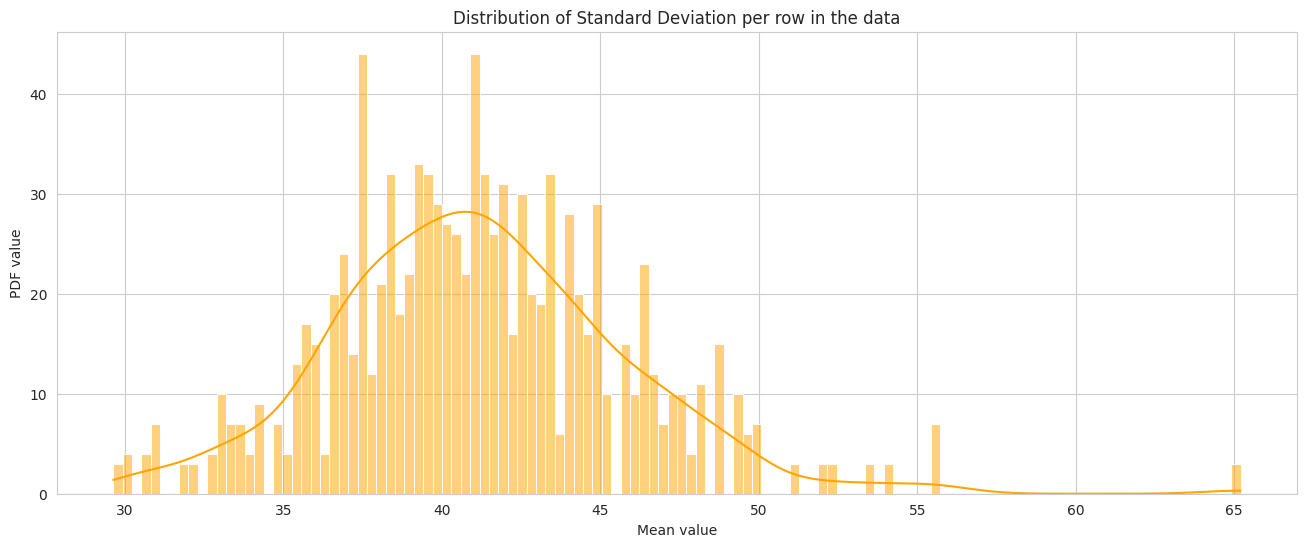

In [ ]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')

# Ensure you're using 'df' instead of 'data'
features = data.columns.values[1:202]  # Assuming you want to select columns from index 1 to 201

plt.title('Distribution of Standard Deviation per row in the data')
plt.xlabel('Mean value')
plt.ylabel('PDF value')

# Select only numeric columns and calculate mean per row
numeric_features = data[features].select_dtypes(include=['number'])

# Plot the distribution of the mean values across rows
sns.histplot(numeric_features.mean(axis=1), color='orange', kde=True, bins=120)

plt.show()

# Data Preprocessing

In [ ]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Handle Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values if any
data = data.dropna()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Feature Scaling

Robust Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming 'data' is your DataFrame

# Select only numeric columns
numeric_features = data.select_dtypes(include=['number'])

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the numeric columns
scaled_features = scaler.fit_transform(numeric_features)

# Convert the scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Optionally, add the non-numeric columns back if needed
# scaled_df = pd.concat([df.drop(columns=numeric_features.columns), scaled_df], axis=1)

# Show the scaled data
print(scaled_data.head())

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.307692  0.0 -0.5     -0.25 -0.437500  0.0      0.0  0.470588    0.0   
1 -0.230769  0.0 -0.5      0.50 -0.578125  1.0     -1.0  0.088235    1.0   
2  1.076923  0.0 -0.5      0.75 -1.031250  0.0      0.0 -0.794118    1.0   
3  0.384615  0.0 -0.5      0.90 -0.578125  0.0      0.0  0.264706    0.0   
4  0.461538 -1.0 -0.5      0.40  0.843750  1.0      0.0 -1.352941    0.0   

    oldpeak  slope   ca  thal  target  
0  0.111111    1.0  2.0   1.0    -1.0  
1  1.277778   -1.0  0.0   1.0    -1.0  
2  1.000000   -1.0  0.0   1.0    -1.0  
3 -0.444444    1.0  1.0   1.0    -1.0  
4  0.611111    0.0  3.0   0.0    -1.0  


- Negative values are normal, especially if the original values were lower than the median or if there were large outliers.

Scaled range: Features are scaled to a new range, but due to the median and IQR, they should remain relatively consistent with the original data distribution.

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Feature Selection

In [ ]:
# Check the column names of the dataframe
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
# Dynamically drop constant and unique columns
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
unique_columns = [col for col in data.columns if data[col].nunique() == len(data)]

# Combine constant and unique columns to drop
drop_columns = constant_columns + unique_columns

# Drop those columns from the dataframe
data_cleaned = data.drop(columns=drop_columns)

# Check the cleaned dataframe
print(data_cleaned.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


1. Drop Unique And Constant Feature

In [ ]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Check for non-numeric columns
print(data_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


2. Proceed with PCA

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming data_numeric is your dataframe with numeric features
# Standardize the numeric data
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as necessary
principal_components = pca.fit_transform(data_numeric_scaled)

# Optionally, convert the result into a DataFrame
data_pca = pd.DataFrame(principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [ ]:
# Print the explained variance ratio for each component
print("Explained Variance Ratio for each component:", pca.explained_variance_ratio_)

# If you want the cumulative explained variance
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio for each component: [0.23669637 0.1134431 ]
Cumulative Explained Variance: [0.23669637 0.35013947]


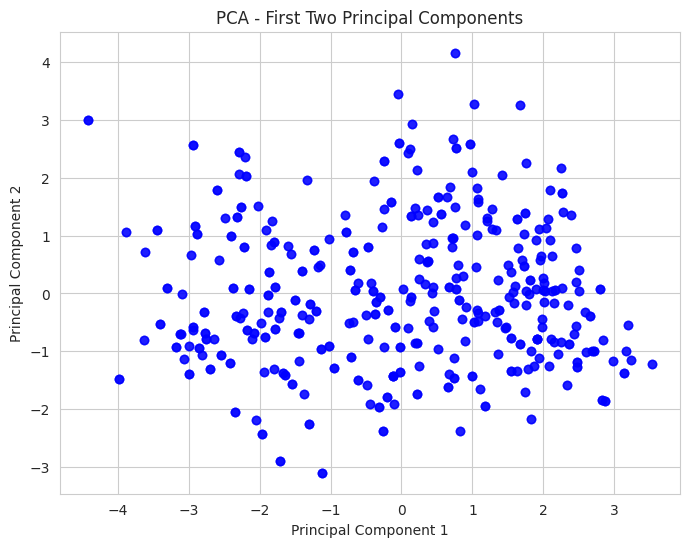

In [ ]:
import matplotlib.pyplot as plt

# Visualize the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(data_pca['Principal Component 1'], data_pca['Principal Component 2'], c='blue', alpha=0.5)
plt.title("PCA - First Two Principal Components")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Model Building

Split Features and Target

In [ ]:
X = data.drop('target', axis=1)  # Features
y = data['target']               # Target variable

Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Artificial Neural Network (ANN) Model

In [ ]:
# ANN Model with 2 hidden layers
ann_model = Sequential()

# Input layer and first hidden layer
ann_model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dropout(0.2))

# Second hidden layer
ann_model.add(Dense(units=16, activation='relu'))
ann_model.add(Dropout(0.2))

# Output layer (binary classification)
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
ann_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [ ]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

ann_history = ann_model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5235 - loss: 0.7143 - val_accuracy: 0.7073 - val_loss: 0.6238
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.5660 - val_accuracy: 0.7512 - val_loss: 0.5460
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7880 - loss: 0.5091 - val_accuracy: 0.7610 - val_loss: 0.4958
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221 - loss: 0.4619 - val_accuracy: 0.7854 - val_loss: 0.4651
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8462 - loss: 0.4318 - val_accuracy: 0.7902 - val_loss: 0.4472
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8461 - loss: 0.3735 - val_accuracy: 0.7854 - val_loss: 0.4404
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8448 - loss: 0.3666 - val_accuracy: 0.7951 - val_loss: 0.4314
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8412 - loss: 0.3665 - val_accuracy: 0.8049 - 

# Evaluate the Model

In [ ]:
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: 0.1723 
Test Accuracy: 91.22%
Test Loss: 0.1710


# # Visualize Training Accuracy as well as Loss

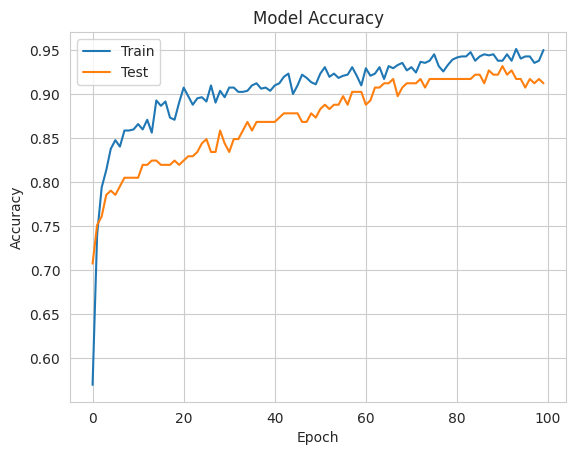

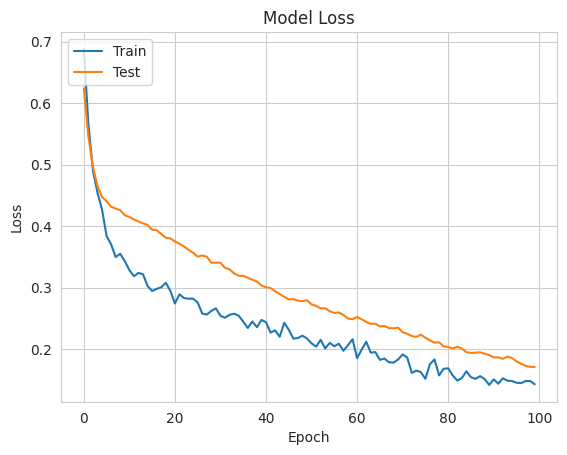

In [ ]:
# Plot training & validation accuracy values
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save the Model

In [ ]:
# Save the model to a file
ann_model.save('heart_dnn_model.h5')

print("Model saved to 'heart_dnn_model.h5'")

Model saved to 'heart_dnn_model.h5'


# Build the Deep Neural Network (DNN) Model

In [ ]:
# DNN Model with 4 hidden layers
dnn_model = Sequential()

# Input layer and first hidden layer
dnn_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
dnn_model.add(Dropout(0.3))  # Adding dropout to reduce overfitting

# Second hidden layer
dnn_model.add(Dense(units=64, activation='relu'))
dnn_model.add(Dropout(0.3))

# Third hidden layer
dnn_model.add(Dense(units=32, activation='relu'))
dnn_model.add(Dropout(0.2))

# Fourth hidden layer
dnn_model.add(Dense(units=16, activation='relu'))
dnn_model.add(Dropout(0.2))

# Output layer (binary classification)
dnn_model.add(Dense(units=1, activation='sigmoid'))

# Print the model summary
dnn_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [ ]:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

dnn_history = dnn_model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5063 - loss: 0.6861 - val_accuracy: 0.7073 - val_loss: 0.6194
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6606 - loss: 0.6183 - val_accuracy: 0.7805 - val_loss: 0.5133
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7336 - loss: 0.5046 - val_accuracy: 0.7756 - val_loss: 0.4470
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8033 - loss: 0.4341 - val_accuracy: 0.8000 - val_loss: 0.4320
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8171 - loss: 0.4098 - val_accuracy: 0.8000 - val_loss: 0.4183
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8606 - loss: 0.3668 - val_accuracy: 0.8000 - val_loss: 0.4077
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8660 - loss: 0.3430 - val_accuracy: 0.8049 - val_loss: 0.3976
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8807 - loss: 0.3271 - val_accuracy: 0.8293 - 

# Evaluate the Model

In [ ]:
loss, accuracy = dnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.0854 
Test Accuracy: 98.05%
Test Loss: 0.0638


# Visualize Training Accuracy as well as Loss

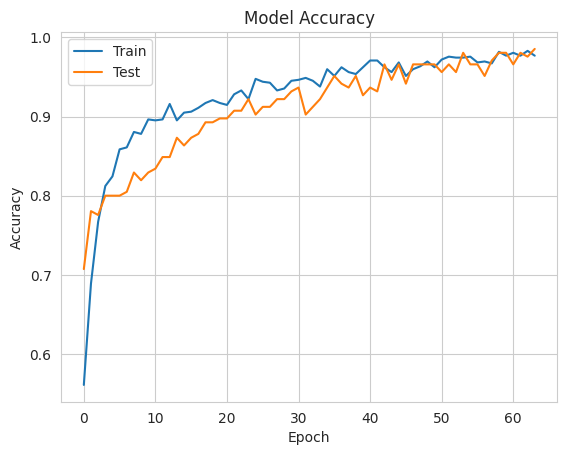

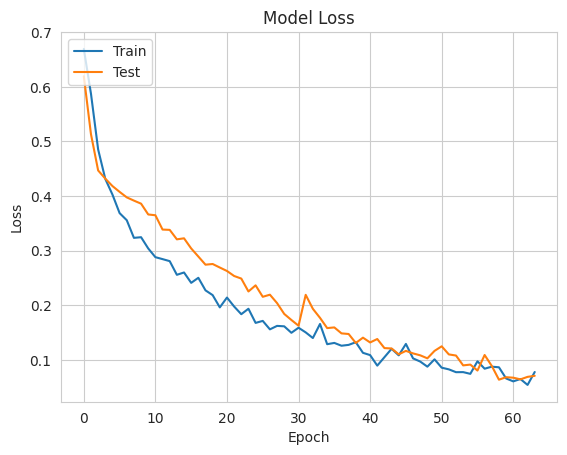

In [ ]:
# Plot training & validation accuracy values
plt.plot(dnn_history.history['accuracy'])
plt.plot(dnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(dnn_history.history['loss'])
plt.plot(dnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save the Nodel

In [ ]:
# Save the model to a file
dnn_model.save('heart_dnn_model.h5')

print("Model saved to 'heart_dnn_model.h5'")

Model saved to 'heart_dnn_model.h5'
